# Advanced matplotlib (or Problems I faced with matplotlib)

**Alejandro Sazo Gómez**<br />
Ingeniero Civil Informático, UTFSM.<br />
Estudiante Magíster en Cs. Ing. Informática, UTFSM

## Distributions over time

Let's supose you have a dynamical system modeling a phenomena and we perform an iterative numerical simulation until we reach a steady state. At each step of the iteration, let's say, a step (or time) $t$, we can get the distribution plot of a certain data.

In this case I worked with **grain growth** simulations...  What is grain growth? OK, briefly we got a system of microscopical grains in ceramic and metals and under certain conditions of temperature and presure the grains grows at expense of other grains, which shrinks and even dissapear.

<img src=fig4.gif></img>
*Source http://www.tms.org/pubs/journals/JOM/0109/Holm-0109.html*

**The distribution of grain areas defines some material properties (conductivity, resistance...).**
So, at each step of the numerical simulation, we can get the (relative) distribution of grain areas. We should find by theoretical results and by experimental data with some real materials that a steady state in distribution is reached independently of the number of grains...

Let's take a look on how a distribution plot should look

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from GrainStructure import Grain_Structure

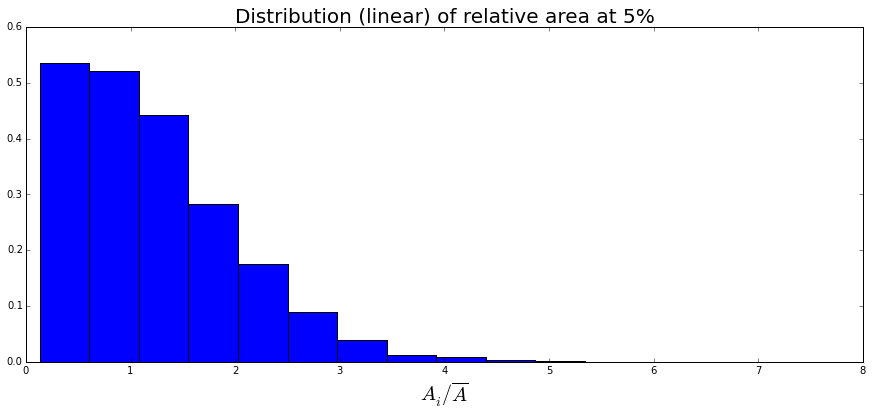

In [4]:
# With pickle we can store objects to files and charge them later
# The class of the stored object must be loaded before!
GS = pickle.load(open("GS/5/all.pkl", "rb"))

# This is the data of the histogram
areas = GS.areas[GS.grains_ids]
relareas = len(areas) * areas

# Let's plot
%matplotlib inline
plt.figure(figsize=(15,6))
fs = 20
bins = np.linspace(-2, 7, 20)
plt.title(r"Distribution (linear) of relative area at 5%", fontsize=fs)

# Here is the histogram. We wanted a distribution, so normed help us to check
# the integral of the distribution be 1
plt.hist(relareas, bins, align='right', normed=True)
# A nice latex label, if it's written in latex, then it must be true...
plt.xlabel(r"$A_i / \overline{A}$", fontsize=fs)
plt.xlim([0, 8])
plt.show()

This distribution corresponds to a numerical simulation after 5% of grains were removed (details on how this happens at the end of presentation... or someday). The histogram has been normed so we can take is as a distribution. So... at this point there are many small grains and a few big grains. A plot of what happens in an advanced state of simulation is shown here:

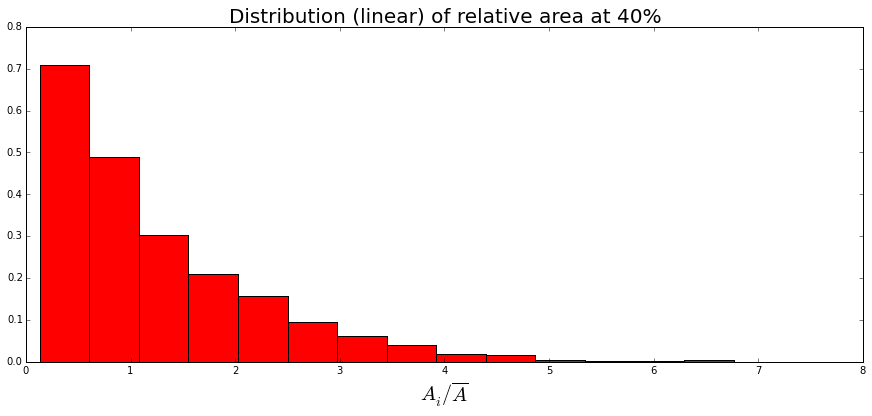

In [42]:
GS = pickle.load(open("GS/40/all.pkl", "rb"))
areas = GS.areas[GS.grains_ids]
relareas = len(areas) * areas
%matplotlib inline
plt.figure(figsize=(15,6))
plt.title(r"Distribution (linear) of relative area at 40%", fontsize=fs)
plt.hist(relareas, bins, align='right', normed=True, color='r')
plt.xlabel(r"$A_i / \overline{A}$", fontsize=fs)
plt.xlim([0, 8])
plt.show()

It's difficult to say if there are more small grains than the beggining of the simulation, of if the number of big grains increased or stood still.
We could plot this histograms (or distributions) over time! Does that mean a 3D plot? sure!

First of all, the simulation stops at 40% of removed grains. Each 1% of removed grains the structure was saved using pickle library. So I have plenty distributions to plot. Let's see how we can do that...

<IPython.core.display.Javascript object>


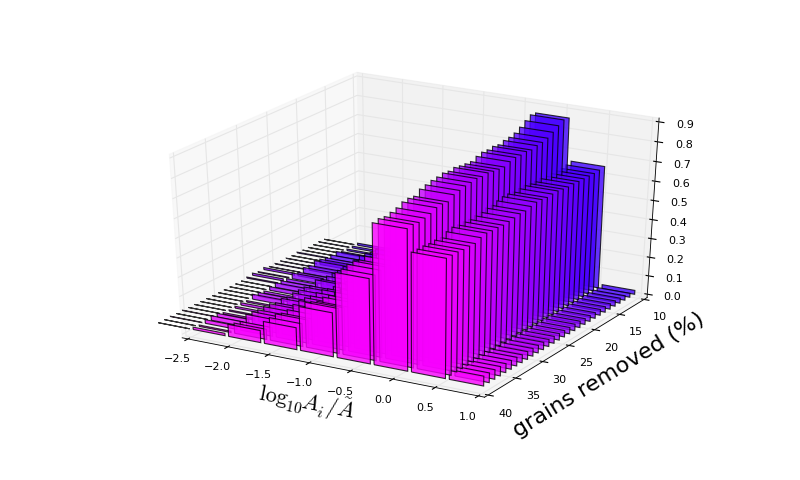

(-2.5, 1.0)

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure
fig = plt.figure(figsize=(10,6))
# Add a 3D subplot in figure, in general its methods are the same as a plt.something
ax = fig.add_subplot(111,projection='3d')
# Our bins for plot log(distribution)
binslog = np.linspace(-3, 1, 10)
# Range for represent my files
percentages = np.arange(10, 40, 1)
#percentages = np.arange(10, 40, 5)
# For each file
for i in percentages:
    # Load data
    GS = pickle.load(open("GS/"+str(i)+"/all.pkl", "rb"))
    areas = GS.areas[GS.grains_ids]
    relareas = np.log10(len(areas) * areas) # or areas.shape[0] * areas
    # Generate an histogram data with numpy instead of directly plot
    # n is actually the histogram, we use the bins to plot "manually" the bars
    n, bins_edges = np.histogram(relareas, binslog, density=True)
    ax.bar(binslog[:-1], n, width=0.4, zs=i, zdir='y', color=(i/40.0, 0.0, 1.0), alpha=0.8)
# Fancy axis labels...
ax.set_xlabel(r'$\log_{10} A_i / \tilde{A}$', fontsize=fs)
ax.set_ylabel(r'grains removed (%)', fontsize=fs)
# I wanted to show the history in the y axis from back to front
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim([-2.5, 1.0])

# Record a simulation with matplotlib